# Titanic Survival Prediction Project

## 1.Introduction

**Problem:** Predict whether a passenger survived the Titanic shipwreck.

**Dataset:** Titanic dataset from Kaggle (`train.csv`).

**Goal:** Build a machine learning model to predict survival and deploy it via a Flask API for easy access.


## 2.Data Loading

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv(r'../data/raw/train.csv')

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.shape

(891, 12)

## 3.EDA- Exploratory Data Analysis

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Understanding the Data

- **Target Column**: `Survived` (0 = died, 1 = survived)
- **Useful in Prediction**: `Pclass`, `Sex`, `Age`, `Fare`, `SibSp`, `Parch`
- **Missing Values**: Age (177), Cabin (687), Embarked (2)
- **Notes**:
  - `Cabin` has too many missing values, may drop it.
  - `Fare` has huge range, maybe scale it later.
  - Name may be useful to extract title.


### Data Visualizations


#### Age

##### Plot 1

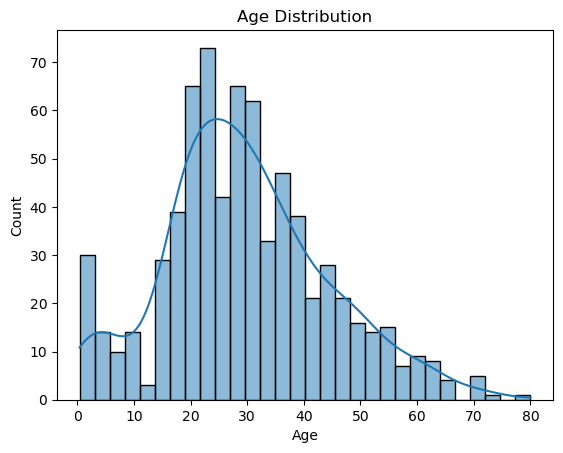

In [105]:
#histogram of Age
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


    Most passengers were between 20 and 40 years old.

#### Passenger class

##### Plot 1

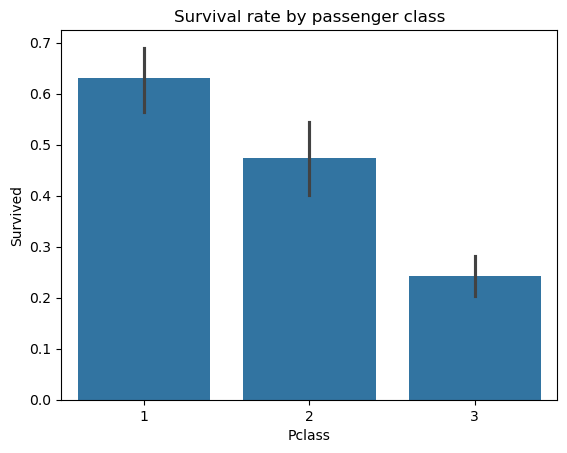

In [106]:
#bar blop: survival rate by p clas
sns.barplot(x='Pclass', y='Survived' , data=df)
plt.title('Survival rate by passenger class')
plt.show()

    the upper class (1) has highest rate of survival and the lower class has lowest survival rates

##### Plot 2

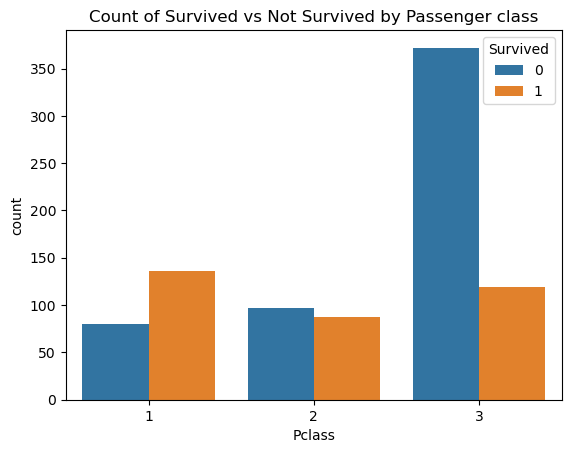

In [107]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Count of Survived vs Not Survived by Passenger class')
plt.show()

    The graph reveals a clear trend: higher passenger classes had significantly better survival rates, while lower classes experienced more fatalities.

#### Sex

##### Plot 1

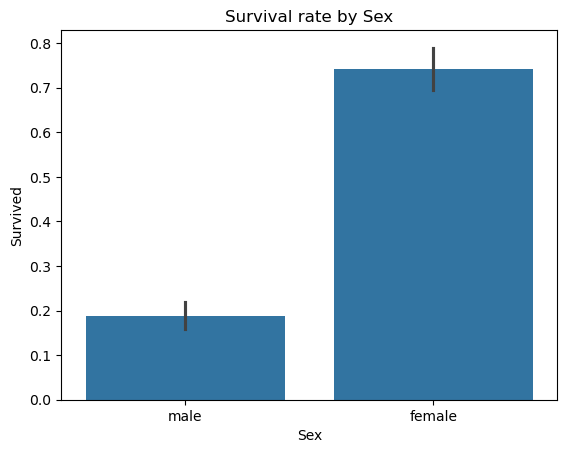

In [108]:
#survival by sex
sns.barplot(x='Sex',y='Survived' , data = df)
plt.title('Survival rate by Sex')
plt.show()

     "The average survival rate of females was much higher than males."

##### Plot 2

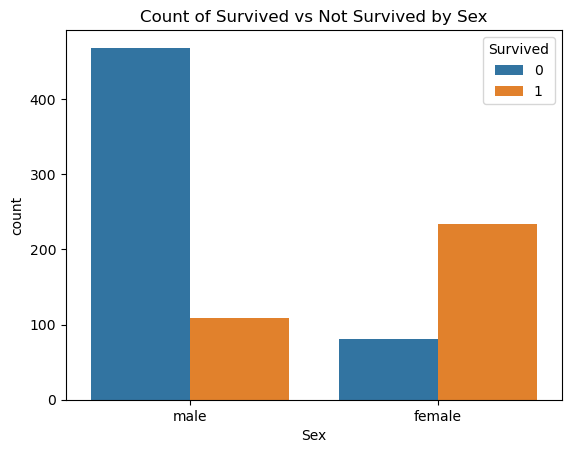

In [109]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Count of Survived vs Not Survived by Sex')
plt.show()


    More females survived compared to males. most males did not survive

#### Embarked

##### Plot 1

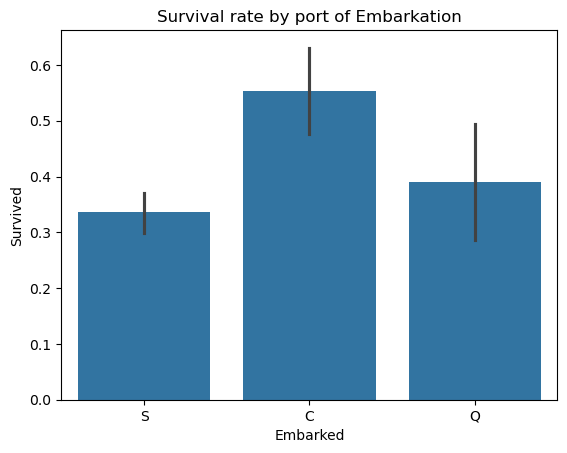

In [110]:
#survival by embark
sns.barplot(x='Embarked',y='Survived' , data = df)
plt.title('Survival rate by port of Embarkation')
plt.show()

         People from port C (Cherbourg) had higher survival — many were 1st class.

##### Plot 2

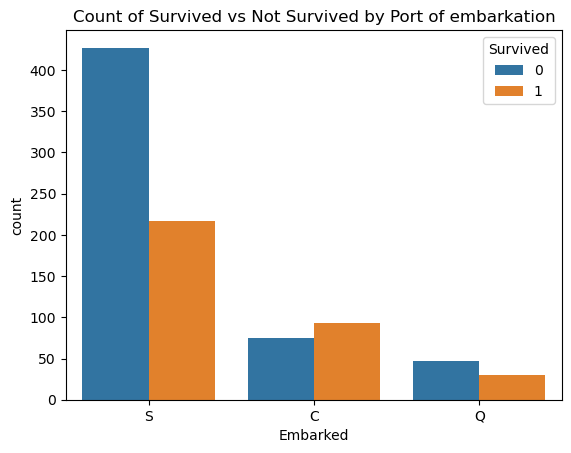

In [111]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Count of Survived vs Not Survived by Port of embarkation')
plt.show()


    The distribution shows that most passengers boarded from Southampton (S), with around 400 not surviving. It also had the highest number of survivors. In contrast, Queenstown (Q) had the fewest survivors, with fewer than 50.

#### Fare

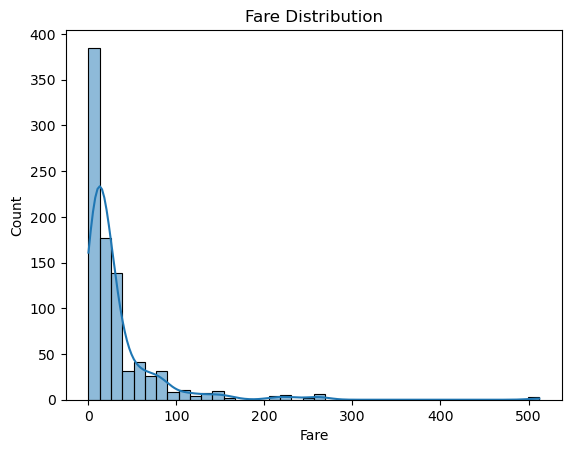

In [112]:
sns.histplot(data=df, x='Fare', bins=40, kde=True)
plt.title('Fare Distribution')
plt.show()

## 4.Data Cleaning & Feature Engineering

### Handling missing values

#### Handle "Age"

In [113]:
df['Age'] = df['Age'].fillna(df['Age'].median())

#### Handle "Embarked"

In [114]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### Handle cabin : 

too many missing valuesDropped the "Cabin" column due to excessive missing values (~77%), which would be unreliable to impute.

In [115]:
df.drop(columns = 'Cabin' , inplace = True )

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Feature engineering 

#### title extraction

- The Name column has full names, including titles like Mr, Mrs, Miss, Master, Dr, etc.

- These titles give info about age group, gender, or social status which can affect survival.

##### 1 - extract titles from names

In [117]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [118]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [119]:
df['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

##### 2 -Group rare titles
Some titles like Don, Lady, Countess are very rare — we combine them into one group: 'Rare'.

In [120]:
df['Title'] = df['Title'].replace(['Don' , 'Jonkheer', 'Sir','Capt','Countess','Col','Major','Rev',
                                  'Dr'],'Rare')
df['Title'] = df['Title'].replace(['Lady','Mme'],'Mrs')
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')

df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       127
Master     40
Rare       22
Name: count, dtype: int64

#### New feature to create

##### 3 - create family size

family size = Parch(parent/children) + SibSp(spouse/sibling) + 1( for self )

In [121]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

##### 4- create isAlone

In [122]:
df['isAlone'] = 0
df.loc[df['FamilySize']==1 , 'isAlone'] = 1



- FamilySize shows if passenger is traveling alone or with family

- IsAlone is a binary feature, often useful to show survival chances

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  isAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


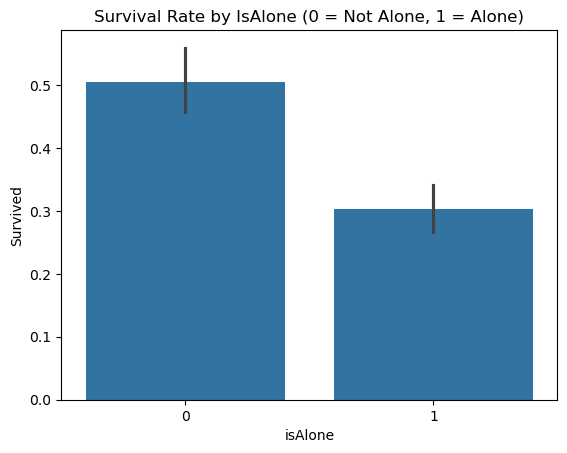

In [124]:
#Visualize Survival by IsAlone
sns.barplot(x='isAlone', y='Survived', data=df)
plt.title('Survival Rate by IsAlone (0 = Not Alone, 1 = Alone)')
plt.show()


    Passengers who were alone had a lower survival rate compared to those traveling with family.

##### 5. Encode Categorical Columns (Sex, Embarked, and Title)

In [125]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})

In [126]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [127]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4}
df['Title'] = df['Title'].map(title_mapping)

##### 6. dropping columns which are not necessary for our prediction

In [128]:
df.drop(['Name' , 'Ticket'],axis = 1 , inplace= True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
 10  FamilySize   891 non-null    int64  
 11  isAlone      891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [130]:
df.to_csv('titanic_cleaned.csv', index=False)


## 5. Model Training & Evaluation

###  1. Baseline Model: Logistic Regression

>Goal : Train & evaluate simple model

1.  Train/test split
    
2.  Train logistic regression
    
3.  Evaluate accuracy and performance  
     This gives us our **first working model**

#### Train/test split



In [131]:
X = df.drop(['Survived', 'PassengerId'], axis = 1)
y = df['Survived']

In [132]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=42)

#### Train logistic regression



In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled , y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy Score: " , accuracy_score(y_test , y_pred))
print("\nConfusion matrics:\n" , confusion_matrix(y_test , y_pred))
print("\nClassification report" , classification_report(y_test , y_pred))




Accuracy Score:  0.7821229050279329

Confusion matrics:
 [[87 18]
 [21 53]]

Classification report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



##### Insight:
>The model predicts survival with about 78% accuracy. It performs better at identifying passengers who did not survive compared to those who survived.

### 2. Model Improvement and Hyperparameter Tuning : Random forest

#### 2.1 Random Forest - 

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.8324022346368715
Confusion Matrix:
 [[91 14]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



##### Insight:
    Model Performance After Feature Engineering, accuracy increased to 83.2%. Both classes (survived and not survived) now show better precision and recall, especially for class 1 (survived), which rose from 0.75 to 0.80. This means the model is now better at correctly predicting survival.

#### 2.2 Model Pipelining

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),           # Feature scaling
    ('model', RandomForestClassifier())     # Model
])

pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


#### 2.3 Hyperparameter Tuning with GridSearchCV

    for improving model’s performance by finding the best parameters for RandomForestClassifier.

In [136]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}

# GridSearchCV setup
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy = accuracy_score(y_test , y_pred_best)

print(f"Final tuned accuracy {accuracy:.2f}")


Final tuned accuracy 0.83


### 3 Model Comparison (Logistic Regression vs Random Forest vs KNN)

- comparison metrics to justify choosing Random Forest.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


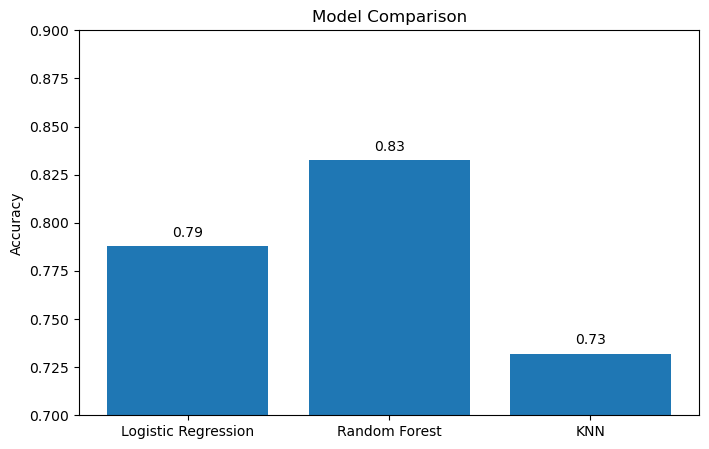

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

log_model = LogisticRegression()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

#training the models
# Train models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Accuracy
log_acc = accuracy_score(y_test, log_pred)
rf_acc = accuracy_score(y_test, rf_pred)
knn_acc = accuracy_score(y_test, knn_pred)

# Plot
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracies = [log_acc, rf_acc, knn_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.7, 0.9)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.2f}', ha='center')
plt.show()


#ignore warning we are jsut comparing models

## 6. Model Selection and Saving

### Final Model Selection

>After comparing multiple models including Logistic Regression, K-Nearest Neighbors, and Random Forest, the best performance was achieved using a Random Forest model with pipeline and hyperparameter tuning via GridSearchCV.

>This final model gave the highest accuracy and balanced precision/recall, making it the most reliable for predicting Titanic survival.
It has been selected as the final model for this project.

- **Saving best model with joblib:**

In [138]:
import joblib

joblib.dump(best_model, '../models/titanic_rf_model.pkl') 

['../models/titanic_rf_model.pkl']

## 7. Deployment via Flask API

### 🚀 Deployment via Flask API

We deployed our trained model using a Flask API. Here's the main code:

#### Flask app (app.py)
```python
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)
model = joblib.load('models/titanic_rf_model.pkl')

@app.route('/')
def home():
    return "Titanic Survival Prediction API is running"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)

        expected_keys = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'isAlone']
        for key in expected_keys:
            if key not in data:
                return jsonify({'error': f'Missing feature: {key}'}), 400

        input_df = pd.DataFrame([data])

        prediction = model.predict(input_df)[0]
        probability = model.predict_proba(input_df)[0][1]

        return jsonify({
            'Survived': int(prediction),
            'Survival Probability': float(probability)
        })

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == "__main__":
    app.run(debug=True)
```

###  Code Highlights:

- `@app.route('/')`: Returns a message to confirm API is running.
- `@app.route('/predict', methods=['POST'])`: Accepts passenger data in JSON, converts it to a DataFrame, and returns:
  - `Survived`: 0 or 1
  - `Survival Probability`: Confidence score

###  Safety Checks:
- Ensures all 10 required features are present.
- Handles errors and returns useful messages if input is wrong.

### Postman Test:

**Input JSON:**
```json
{
  "Pclass": 3,
  "Sex": 0,
  "Age": 22,
  "SibSp": 1,
  "Parch": 0,
  "Fare": 7.25,
  "Embarked": 0,
  "Title": 1,
  "FamilySize": 2,
  "isAlone": 0
}
```

### output 

{
  
  "Survived": 0,
  
  "Survival Probability": 0.2676

}



## 8. Final Testing & Sample Prediction

### Final Testing & Sample Prediction

Once the Flask API was running, we tested it using **Postman** with various inputs.

#### Sample Input:
```json
{
  "Pclass": 1,
  "Sex": 1,
  "Age": 35,
  "SibSp": 0,
  "Parch": 0,
  "Fare": 100,
  "Embarked": 1,
  "Title": 0,
  "FamilySize": 1,
  "isAlone": 1
}
```

#### Ouput:
{

    "Survival Probability": 0.7251698555666978,
    "Survived": 1
}

![Output](sample_output.png)


#### Explanation:

>Survived: 1 means the model predicts the person would survive.

>Survival Probability gives the model's confidence (e.g., 72% in this case).

## 9. Learnings & Improvements

###  Learnings & Improvements

###  What I Learned:
- Data preprocessing (missing values, feature engineering)
- Using scikit-learn to train classification models
- Model evaluation techniques (accuracy, confusion matrix, etc.)
- Saving and loading models using `joblib`
- Creating and testing a Flask API
- Sending JSON data to an ML model via Postman

###  Possible Improvements:
- Build a small web frontend to send input
- Use Docker for deployment
